# Задание
Сделать компьютерную модель случайной величины, являющейся суммой квадратов двух независимых, равномерно распределённых на отрезке $[-1, +1]$ случайных величин (кто ещё не сделал). 
Определить опытным путём с точностью до третьего знака вероятность попадания в промежуток $[1.25, 1.5]$ этой случайной величины.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
sample_size = 10000
interval = {'low' : 1.25, 'high' : 1.5}

def sum_square_uniform_seq(sample_size):
    first_seq = np.random.uniform(-1, 1, size = sample_size) ** 2
    second_seq = np.random.uniform(-1, 1, size = sample_size) ** 2
    return first_seq + second_seq

sum_seq = sum_square_uniform_seq(sample_size)

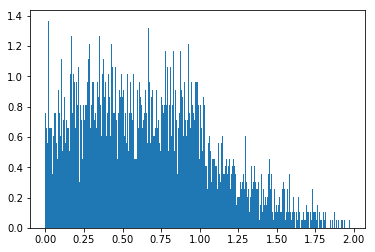

In [3]:
plt.hist(sum_seq, normed=True, bins=sample_size // 10);

In [4]:
%%time
convergence_list = []
for sample_size in [10** x for x in range(1, 8)] :
    sum_seq = sum_square_uniform_seq(sample_size)
    est_proba = np.count_nonzero((sum_seq >= interval['low']) & (sum_seq <= interval['high'])) / sample_size
    convergence_list.append(est_proba)
    print('sample size:           {}'.format(sample_size))
    print('estimated probability: {}'.format(est_proba))
    if len(convergence_list) >= 2:
        print('estimations difference : {}\n'.format(np.abs(convergence_list[-1] - convergence_list[-2])))
    

sample size:           10
estimated probability: 0.1
sample size:           100
estimated probability: 0.07
estimations difference : 0.03

sample size:           1000
estimated probability: 0.068
estimations difference : 0.0020000000000000018

sample size:           10000
estimated probability: 0.0608
estimations difference : 0.007200000000000005

sample size:           100000
estimated probability: 0.06039
estimations difference : 0.00041000000000000064

sample size:           1000000
estimated probability: 0.059838
estimations difference : 0.0005519999999999969

sample size:           10000000
estimated probability: 0.0599072
estimations difference : 6.919999999999843e-05

Wall time: 543 ms


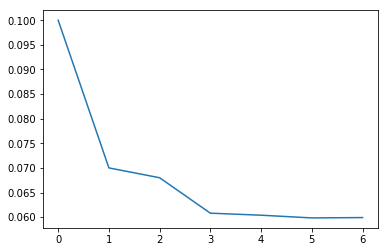

In [5]:
plt.plot(convergence_list);

Таким образом, вероятность попадания в промежуток [1.25, 1.5] приблизительно равна 0.0599.